Enter a keyword to analyze market trends: accenture
Analyzing market trends for: accenture
Overall sentiment: 0.02 (-1 is very negative, +1 is very positive)
Top topics:
- sentiment: 36.01
- simulated: 36.01
- tweet: 36.01
- accenture: 33.72
- positive: 27.26
- neutral: 24.10
- negative: 19.44
- nvidia: 2.11
- ai: 2.09
- adoption: 1.22


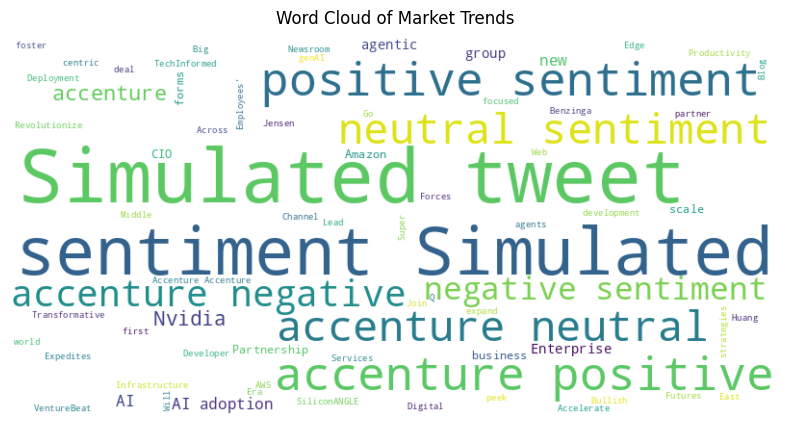

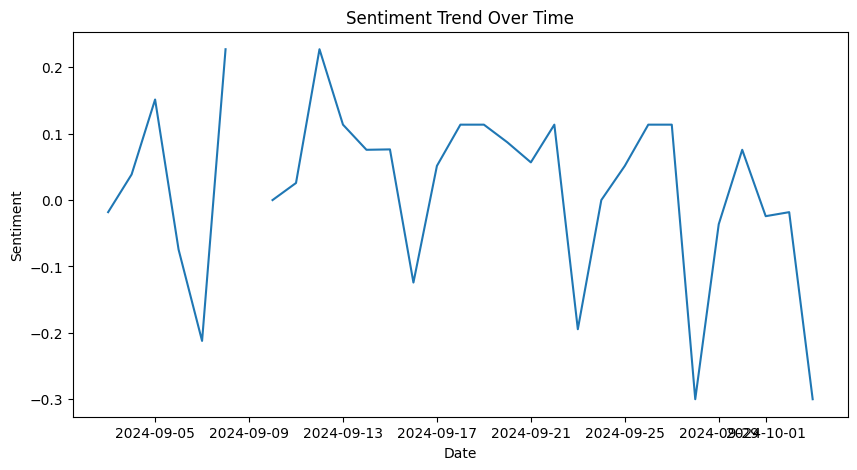

Geographical distribution of mentions:
- Sydney: 21
- Berlin: 19
- London: 19
- Tokyo: 17
- New York: 14
- San Francisco: 10
Key influencers:
- user_5613: 9942 followers
- user_3913: 9917 followers
- user_9652: 9857 followers
- user_8235: 9785 followers
- user_7428: 9704 followers
- user_5898: 9688 followers
- user_4372: 9498 followers
- user_5912: 9285 followers
- user_8543: 9280 followers
- user_7440: 9124 followers


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
from datetime import datetime, timedelta

def fetch_news_articles(keyword, num_articles=10):
    url = f"https://news.google.com/rss/search?q={keyword}&hl=en-US&gl=US&ceid=US:en"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, features="xml")
    articles = soup.findAll('item')

    titles = [article.title.text for article in articles[:num_articles]]
    return titles

def simulate_tweets(keyword, num_tweets=100):
    sentiments = ['positive', 'negative', 'neutral']
    locations = ['New York', 'London', 'Tokyo', 'San Francisco', 'Berlin', 'Sydney']

    simulated_tweets = []
    for _ in range(num_tweets):
        text = f"Simulated tweet about {keyword}: {random.choice(sentiments)} sentiment"
        created_at = datetime.now() - timedelta(days=random.randint(0, 30))
        location = random.choice(locations)
        followers = random.randint(100, 10000)
        simulated_tweets.append({
            'text': text,
            'created_at': created_at,
            'user': {'location': location, 'followers_count': followers, 'screen_name': f"user_{random.randint(1000, 9999)}"}
        })
    return simulated_tweets

def analyze_sentiment(texts):
    sentiments = [TextBlob(text).sentiment.polarity for text in texts]
    return sum(sentiments) / len(sentiments)

def extract_topics(texts):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()  # Updated method

    word_scores = {}
    for col in range(tfidf_matrix.shape[1]):
        word_scores[feature_names[col]] = tfidf_matrix.getcol(col).sum()

    return Counter(word_scores).most_common(10)

def generate_wordcloud(texts):
    text = ' '.join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Market Trends')
    plt.show()

def analyze_trend_over_time(tweets):
    df = pd.DataFrame([(tweet['created_at'], TextBlob(tweet['text']).sentiment.polarity) for tweet in tweets],
                      columns=['date', 'sentiment'])
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    daily_sentiment = df.resample('D').mean()

    plt.figure(figsize=(10, 5))
    plt.plot(daily_sentiment.index, daily_sentiment.sentiment)
    plt.title('Sentiment Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sentiment')
    plt.show()

def geographical_distribution(tweets):
    locations = [tweet['user']['location'] for tweet in tweets if tweet['user']['location']]
    return Counter(locations).most_common(10)

def identify_key_influencers(tweets):
    influencers = [(tweet['user']['screen_name'], tweet['user']['followers_count']) for tweet in tweets]
    return sorted(influencers, key=lambda x: x[1], reverse=True)[:10]

def analyze_market_trends(keyword):
    print(f"Analyzing market trends for: {keyword}")

    # Fetch data
    news_articles = fetch_news_articles(keyword)
    tweets = simulate_tweets(keyword)
    all_texts = news_articles + [tweet['text'] for tweet in tweets]

    # Analyze sentiment
    sentiment = analyze_sentiment(all_texts)
    print(f"Overall sentiment: {sentiment:.2f} (-1 is very negative, +1 is very positive)")

    # Extract topics
    topics = extract_topics(all_texts)
    print("Top topics:")
    for topic, score in topics:
        print(f"- {topic}: {score:.2f}")

    # Generate word cloud
    generate_wordcloud(all_texts)

    # Analyze trend over time
    analyze_trend_over_time(tweets)

    # Geographical distribution of mentions
    geo_distribution = geographical_distribution(tweets)
    print("Geographical distribution of mentions:")
    for location, count in geo_distribution:
        print(f"- {location}: {count}")

    # Identify key influencers
    influencers = identify_key_influencers(tweets)
    print("Key influencers:")
    for name, followers in influencers:
        print(f"- {name}: {followers} followers")

if __name__ == "__main__":
    keyword = input("Enter a keyword to analyze market trends: ")
    analyze_market_trends(keyword)